### This is a simple notebook to build and visualize decision trees.

It accompanies Chapter 2 of the book.

Author: Viviana Acquaviva
    
Some visualization-inspiration credits:

https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d

https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176


In [1]:
import numpy as np

import matplotlib

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import pandas as pd #new!

from sklearn.model_selection import train_test_split #we don't use it here, but it's a useful function!

from sklearn.tree import DecisionTreeClassifier #how methods are imported 

from sklearn import metrics #this will give us access to evaluation metrics

In [2]:
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['figure.dpi'] = 300

In [3]:
#Here is a bunch of packages for visualization purposes only - this cell can be skipped if troublesome

from io import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz #you can just use this if the other lines give troubles

### We use a selection of data from http://phl.upr.edu/projects/habitable-exoplanets-catalog/data/database

### We begin by reading in the data set using pandas.

In [4]:
LearningSet = pd.read_csv('HPLearningSet.csv')

In [6]:
!head 'HPLearningSet.csv'

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.6014720000000002,0.043718212,0
1,Kepler-636 b,0.85,16.080661,0.11808239,0
2,Kepler-887 c,1.19,7.6384602,0.080419696,0
3,Kepler-442 b,0.61,112.3053,0.4093272,1
4,Kepler-772 b,0.98,12.992073,0.10740815,0
5,Teegarden's Star b,0.09,4.91,0.0252,1
6,K2-116 b,0.69,4.655411,0.0480864,0
7,GJ 1061 c,0.12,6.689,0.035,1
8,HD 68402 b,1.12,1103.0,2.180981,0


In [5]:
LearningSet

,Unnamed: 0,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,0,Kepler-736 b,0.86,3.601472,0.043718,0
1,1,Kepler-636 b,0.85,16.080661,0.118082,0
2,2,Kepler-887 c,1.19,7.638460,0.080420,0
3,3,Kepler-442 b,0.61,112.305300,0.409327,1
4,4,Kepler-772 b,0.98,12.992073,0.107408,0
5,5,Teegarden's Star b,0.09,4.910000,0.025200,1
6,6,K2-116 b,0.69,4.655411,0.048086,0
7,7,GJ 1061 c,0.12,6.689000,0.035000,1
8,8,HD 68402 b,1.12,1103.000000,2.180981,0
9,9,Kepler-1544 b,0.81,168.811170,0.557107,1


In [7]:
LearningSet = LearningSet.drop(LearningSet.columns[0], axis=1) #We want to drop the first column of the file

The structure we created is called a data frame.

It's nice because we can refer to columns with their names as well as indices, and it looks neat. 

In [8]:
LearningSet

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.601472,0.043718,0
1,Kepler-636 b,0.85,16.080661,0.118082,0
2,Kepler-887 c,1.19,7.638460,0.080420,0
3,Kepler-442 b,0.61,112.305300,0.409327,1
4,Kepler-772 b,0.98,12.992073,0.107408,0
5,Teegarden's Star b,0.09,4.910000,0.025200,1
6,K2-116 b,0.69,4.655411,0.048086,0
7,GJ 1061 c,0.12,6.689000,0.035000,1
8,HD 68402 b,1.12,1103.000000,2.180981,0
9,Kepler-1544 b,0.81,168.811170,0.557107,1


In [11]:
LearningSet[['P_NAME','S_MASS']] #convenient way to access columns

,P_NAME,S_MASS
0,Kepler-736 b,0.86
1,Kepler-636 b,0.85
2,Kepler-887 c,1.19
3,Kepler-442 b,0.61
4,Kepler-772 b,0.98
5,Teegarden's Star b,0.09
6,K2-116 b,0.69
7,GJ 1061 c,0.12
8,HD 68402 b,1.12
9,Kepler-1544 b,0.81


In [10]:
LearningSet.P_NAME #another one!

0           Kepler-736 b
1           Kepler-636 b
2           Kepler-887 c
3           Kepler-442 b
4           Kepler-772 b
5     Teegarden's Star b
6               K2-116 b
7              GJ 1061 c
8             HD 68402 b
9          Kepler-1544 b
10          Kepler-296 e
11          Kepler-705 b
12          Kepler-445 c
13           HD 104067 b
14             GJ 4276 b
15          Kepler-296 f
16           Kepler-63 b
17             GJ 3293 d
Name: P_NAME, dtype: object

### Let's pick the same train/test set we had in the exercise.

Note the use of ".iloc" (integer location) to access indices in data frames.

In [12]:
TrainSet =  LearningSet.iloc[:13,:]  #normally this would happen at random, using the function train_test_split

TestSet = LearningSet.iloc[13:,:]

In [13]:
TrainSet

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.601472,0.043718,0
1,Kepler-636 b,0.85,16.080661,0.118082,0
2,Kepler-887 c,1.19,7.638460,0.080420,0
3,Kepler-442 b,0.61,112.305300,0.409327,1
4,Kepler-772 b,0.98,12.992073,0.107408,0
5,Teegarden's Star b,0.09,4.910000,0.025200,1
6,K2-116 b,0.69,4.655411,0.048086,0
7,GJ 1061 c,0.12,6.689000,0.035000,1
8,HD 68402 b,1.12,1103.000000,2.180981,0
9,Kepler-1544 b,0.81,168.811170,0.557107,1


In [14]:
TestSet

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
13,HD 104067 b,0.62,55.80600,0.260000,0
14,GJ 4276 b,0.41,13.35200,0.087613,0
15,Kepler-296 f,0.50,63.33627,0.268885,1
16,Kepler-63 b,0.98,9.43415,0.088100,0
17,GJ 3293 d,0.42,48.13450,0.195336,1


### We split the train and test sets in features and labels.

In [15]:
Xtrain = TrainSet.drop(['P_NAME','P_HABITABLE'],axis=1) #features for the train set

Xtest = TestSet.drop(['P_NAME','P_HABITABLE'],axis=1) #features for the test set

In [16]:
ytrain = TrainSet.P_HABITABLE #target for the train set

ytest = TestSet.P_HABITABLE  #target for the test set

### And we are ready to fit the model with our decision tree!

Note: The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. 

To obtain a deterministic behaviour during fitting, random_state has to be fixed.


In [17]:
model = DecisionTreeClassifier(random_state = 3) #This is how we specify which method we'd like to use, and any parameters.

model.fit(Xtrain, ytrain) #This tiny line is how we build models in sklearn.

DecisionTreeClassifier(random_state=3)

### Finally, we can visualize the tree.

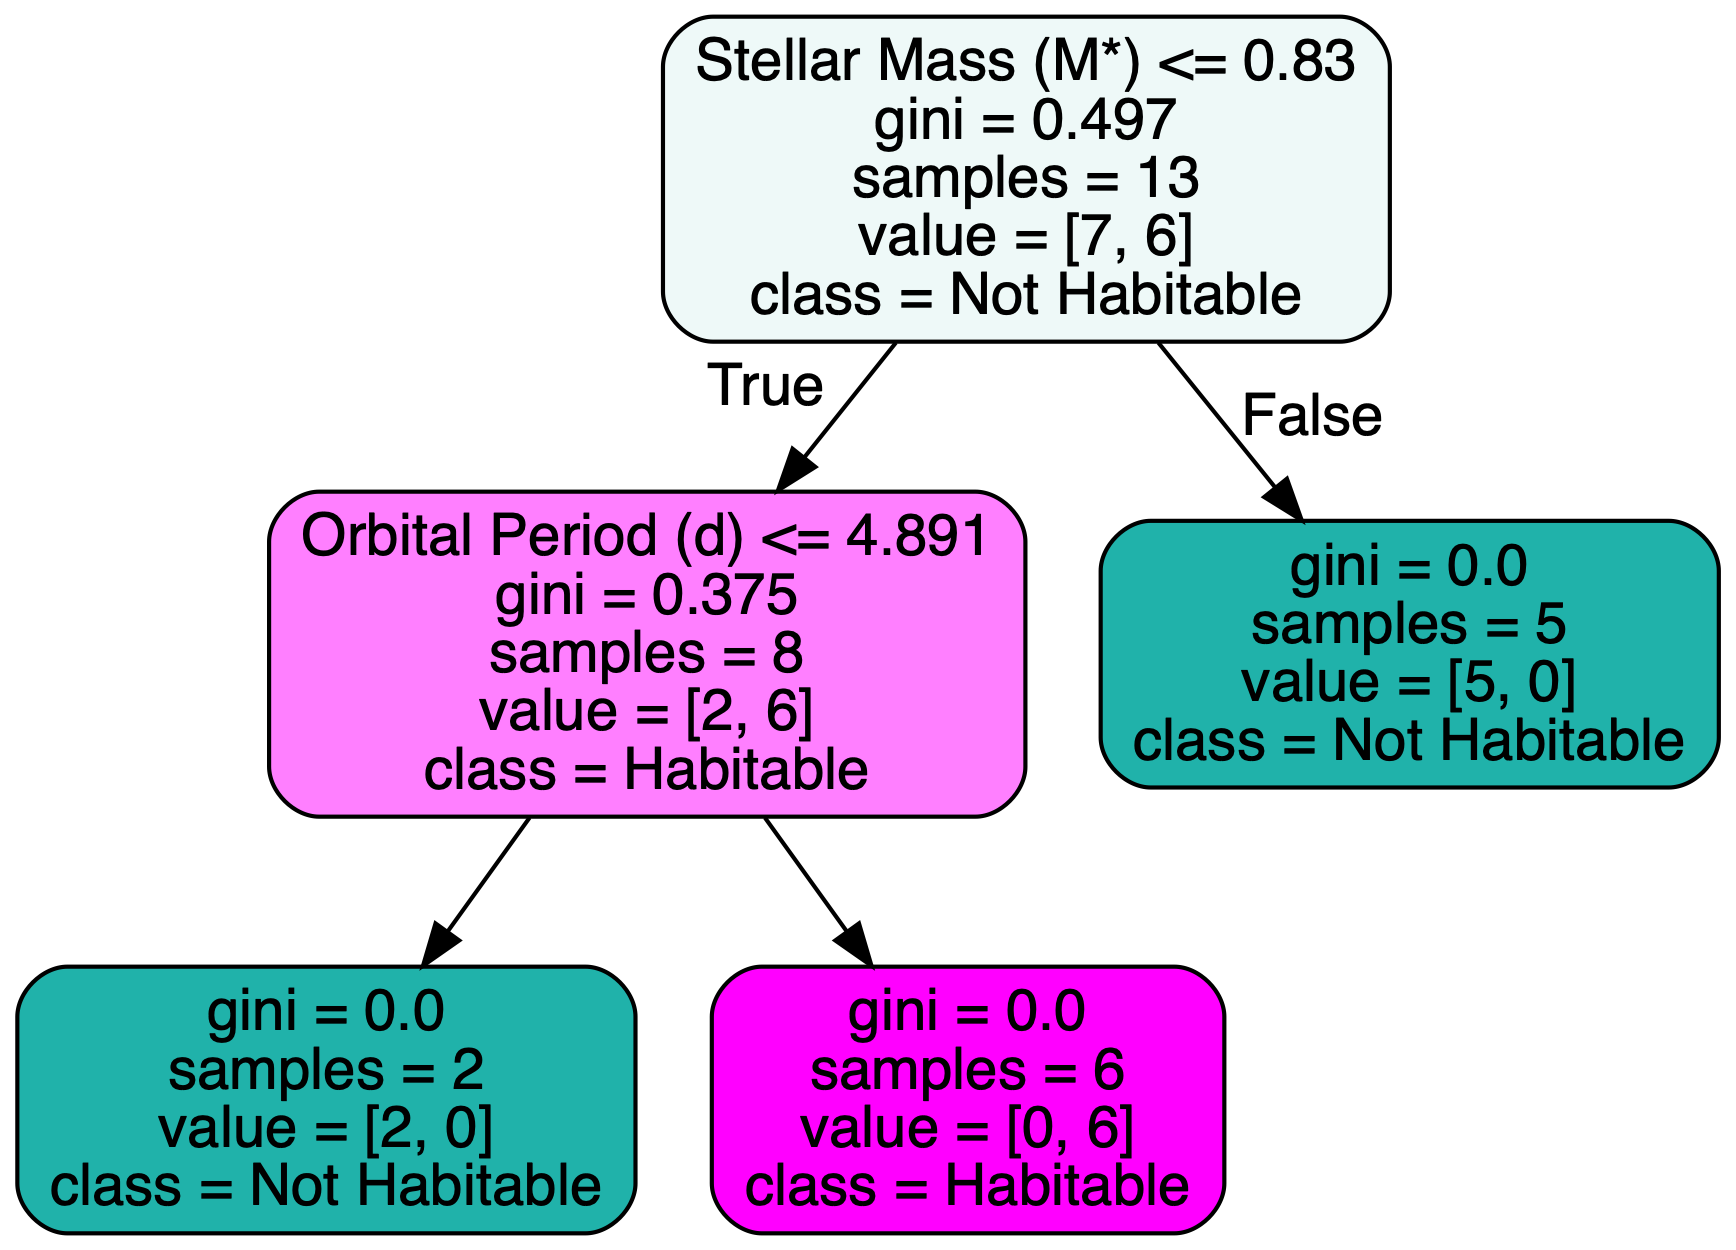

In [18]:
dot_data = StringIO()
export_graphviz(
            model,
            out_file =  dot_data,
            feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'],
            class_names = ['Not Habitable','Habitable'],
            filled = True,
            rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
        values = [255 * v / sum(values) for v in values]
        
        values = [int(255 * v / sum(values)) for v in values]
            
        if values[0] > values[1]:
            alpha = int(values[0] - values[1])
            alpha = '{:02x}'.format(alpha) #turn into hexadecimal
            color = '#20 B2 AA'+str(alpha)
        else:
            alpha = int(values[1] - values[0])
            alpha = '{:02x}'.format(alpha)
            color = '#FF 00 FF'+str(alpha)
        node.set_fillcolor(color)

graph.set_dpi('300')

Image(graph.create_png())

#Image(graph.write_png('Graph.png'))

### This is an alternative visualization, which only relies on the sklearn package.

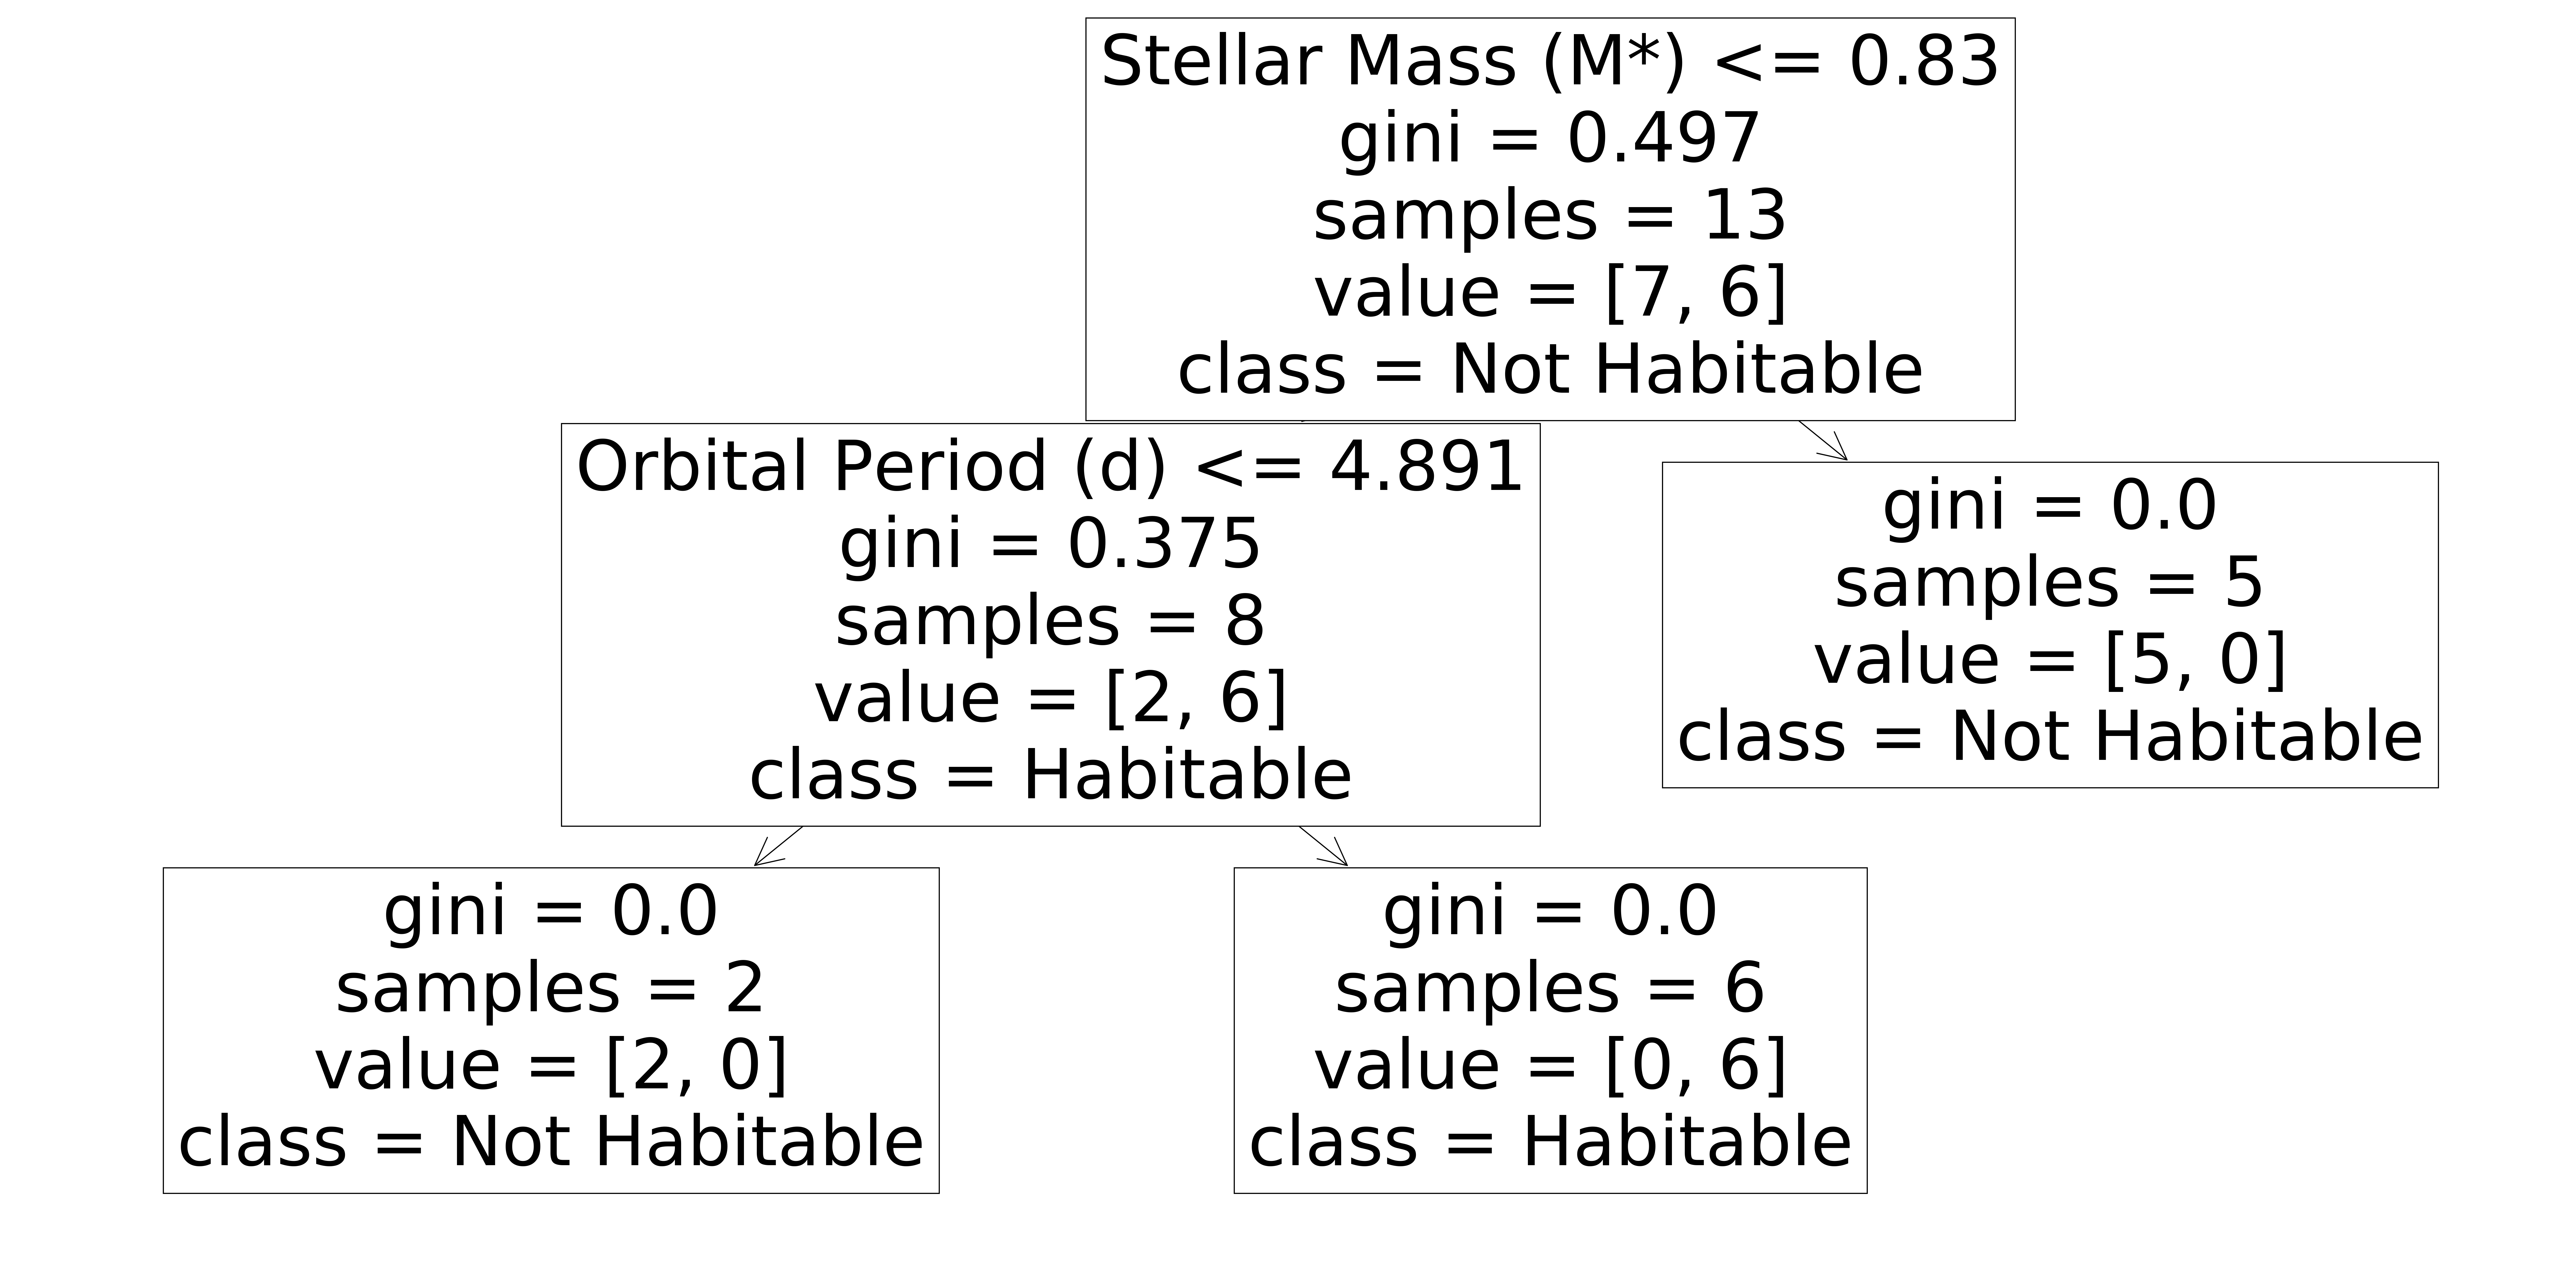

In [19]:
from sklearn import tree

plt.figure(figsize=(40,20))  # customize according to the size of your tree

tree.plot_tree(model, feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'], class_names = ['Not Habitable','Habitable'])

plt.show()

### We can visualize the splits as well and then answer some questions.

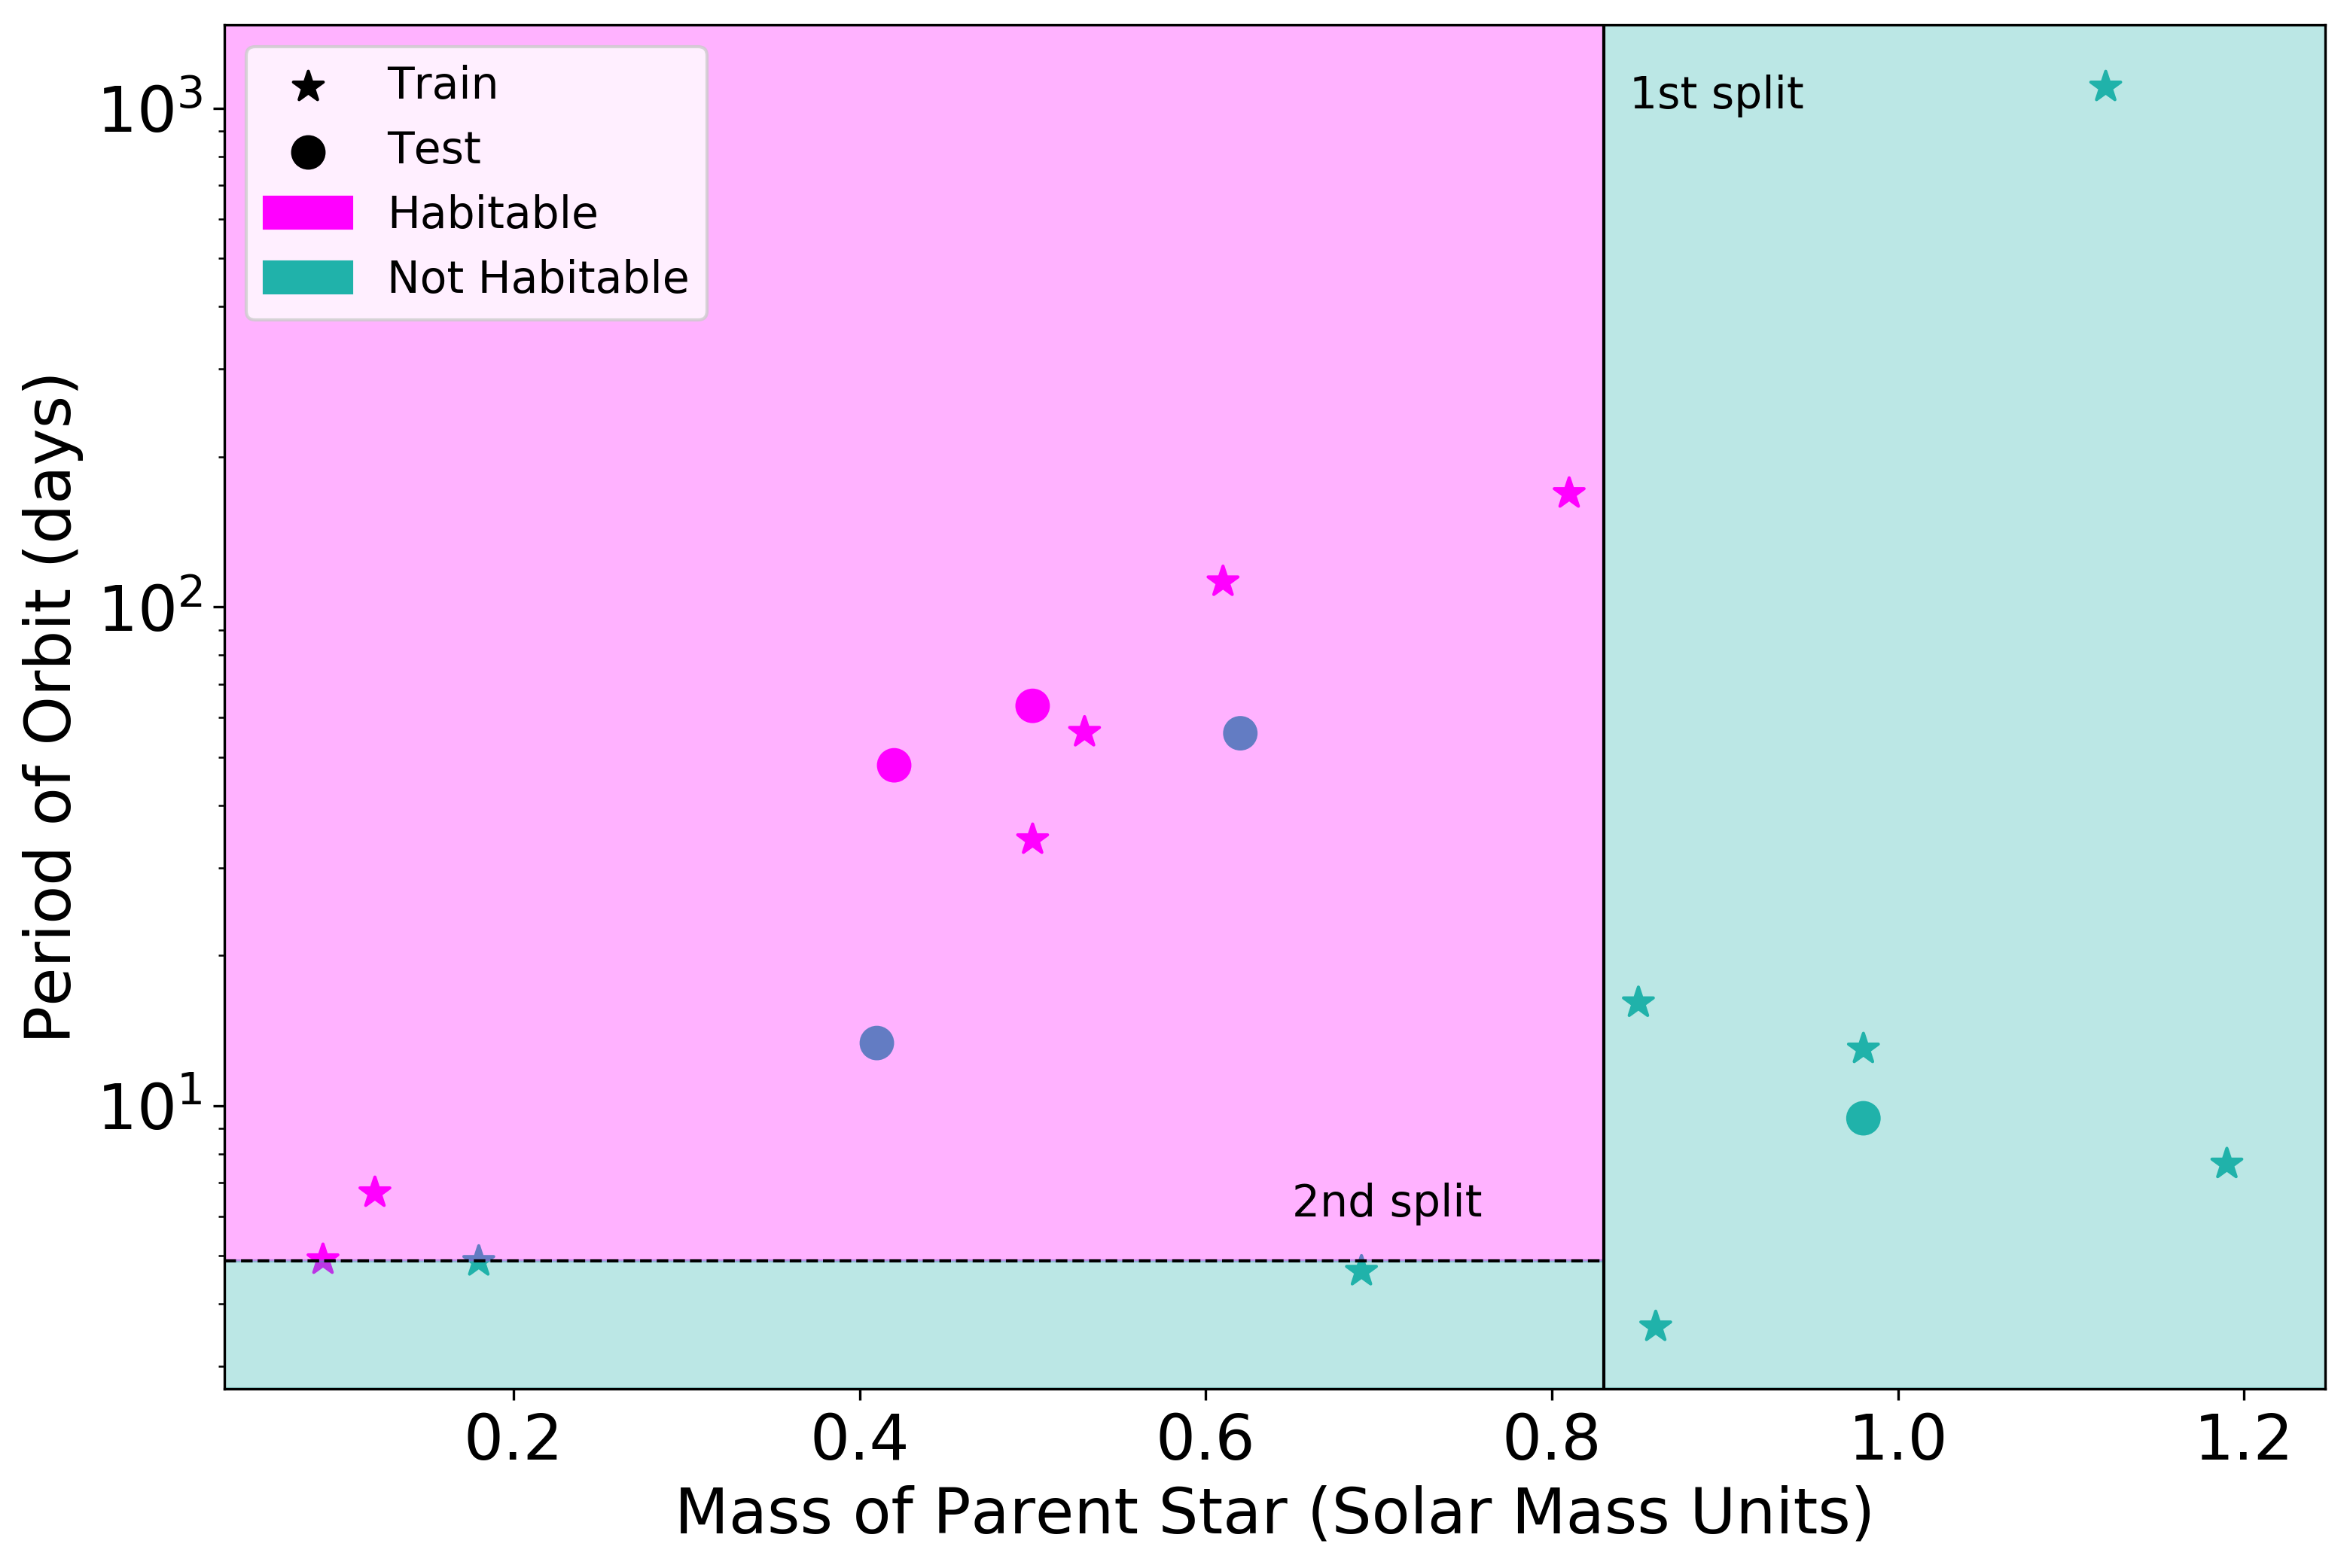

In [20]:
plt.figure(figsize=(12,8))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])

#Will now plot the train set and test set points

plt.scatter(TrainSet['S_MASS'], TrainSet['P_PERIOD'], marker = '*',\
            c = TrainSet['P_HABITABLE'], s = 100, cmap=cmap, label = 'Train')

plt.scatter(TestSet['S_MASS'], TestSet['P_PERIOD'], marker = 'o',\
            c = TestSet['P_HABITABLE'], s = 100, cmap=cmap, label = 'Test')

plt.yscale('log')

plt.xlabel('Mass of Parent Star (Solar Mass Units)')

plt.ylabel('Period of Orbit (days)');

#I can add the splits to the plot

plt.axvline(x=0.83, linewidth =1, ls = '-', label = '1st split', c='k')

plt.axhline(y=4.891, xmin = 0, xmax = 0.655, linewidth =1, ls = '--', label = '2nd split',c='k')

plt.text(0.845, 10**3, '1st split', fontsize=14)
         
plt.text(0.65, 6, '2nd split', fontsize=14)

#Add legend, including unlabeled objects

bluepatch = mpatches.Patch(color='#20B2AA', label='Not Habitable')

magentapatch = mpatches.Patch(color='#FF00FF', label='Habitable')

plt.legend();

ax = plt.gca()

predhab = mpatches.Rectangle((0,4.891),0.83,ax.get_ylim()[1], 
                        fill = True,
                        color = '#FF00FF',
                        alpha = 0.3)

prednothab1 = mpatches.Rectangle((0.83,ax.get_ylim()[0]),ax.get_xlim()[1],ax.get_ylim()[1], 
                        fill = True,
                        color = '#20B2AA',
                        alpha = 0.3)

prednothab2 = mpatches.Rectangle((0,ax.get_ylim()[0]),0.83,4.891-ax.get_ylim()[0], 
                        fill = True,
                        color = '#20B2AA',
                        alpha = 0.3)

leg = ax.get_legend()
leg.legendHandles[2].set_color('k')
leg.legendHandles[3].set_color('k')

plt.gca().add_patch(predhab)
plt.gca().add_patch(prednothab1)
plt.gca().add_patch(prednothab2)

leg = ax.get_legend()
leg.legendHandles[2].set_color('k')
leg.legendHandles[3].set_color('k')


plt.legend(handles=[leg.legendHandles[2],leg.legendHandles[3], magentapatch, bluepatch],\
           loc = 'upper left', fontsize = 14);


### Questions: 
    
- What is the accuracy (percentage of correct classifications) on the training set? 100%


- How about on the test set (you have to run the test example through the tree, or look at the figure above)? 3/5 or 60%

In [21]:
#We want, of course, to be able to answer the questions in code as well.

ypred = model.predict(Xtest) #how to generate predicted labels on test set

In [22]:
metrics.accuracy_score(ytest, ypred) #test score

0.6

In [23]:
metrics.accuracy_score(ytrain, model.predict(Xtrain)) #train score

1.0

### Our final reflection will be an exercise in picking a different train/test split.

In [24]:
TrainSet2 = LearningSet.iloc[5:,:] #we pick the first 5 objects for test, 5:18 for training

TestSet2 = LearningSet.iloc[:5,:]

### Go through the motion again...

In [25]:
Xtrain2 = TrainSet2.drop(['P_NAME','P_HABITABLE'],axis=1)

Xtest2 = TestSet2.drop(['P_NAME','P_HABITABLE'],axis=1)

ytrain2 = TrainSet2.P_HABITABLE

ytest2 = TestSet2.P_HABITABLE

### And we are ready to fit the model again with our decision tree!

model = DecisionTreeClassifier(random_state=3)

model.fit(Xtrain2,ytrain2)

DecisionTreeClassifier(random_state=3)

### We can now visualize the new tree:

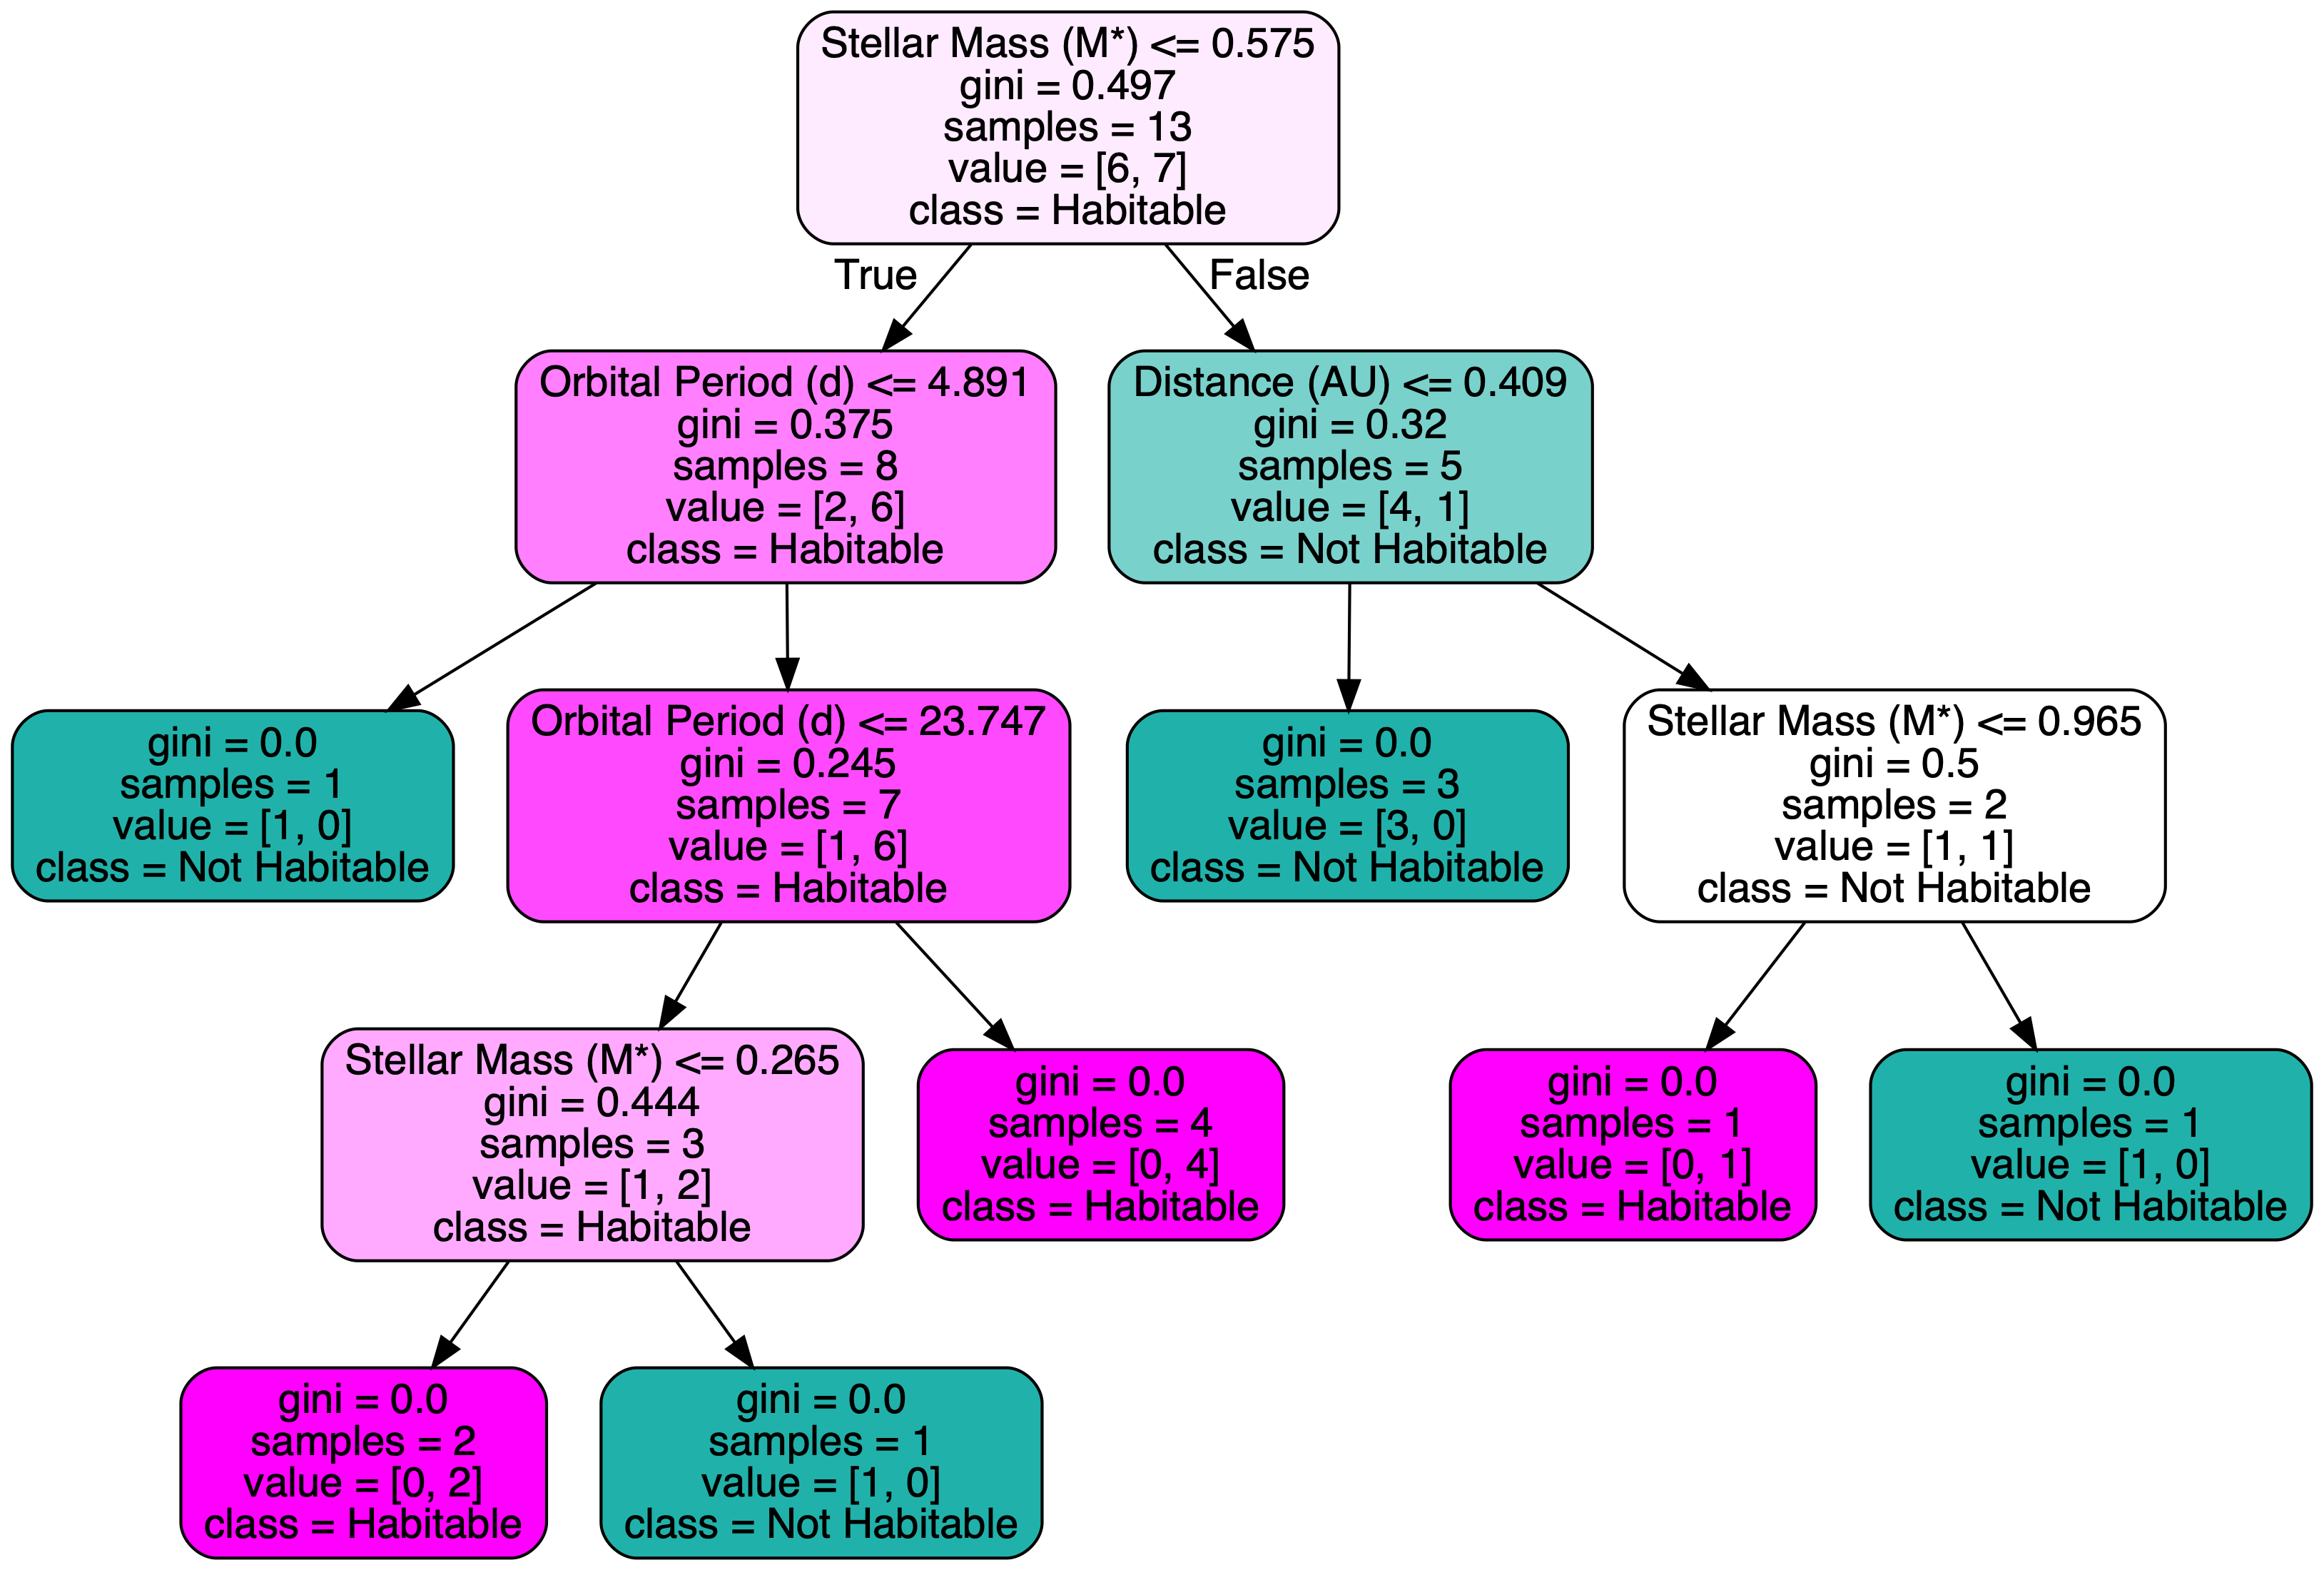

In [26]:
dot_data = StringIO()
export_graphviz(
            model,
            out_file =  dot_data,
            feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'],
            class_names = ['Not Habitable','Habitable'],
            filled = True,
rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
        values = [255 * v / sum(values) for v in values]
        
        values = [int(255 * v / sum(values)) for v in values]
            
        if values[0] > values[1]:
            alpha = int(values[0] - values[1])
            alpha = '{:02x}'.format(alpha) #turn into hexadecimal
            color = '#20 B2 AA'+str(alpha)
        else:
            alpha = int(values[1] - values[0])
            alpha = '{:02x}'.format(alpha)
            color = '#FF 00 FF'+str(alpha)
        node.set_fillcolor(color)

graph.set_dpi('300')

Image(graph.create_png())

#Image(graph.write_png('Graph.png'))

### As you can see, this is quite different from the one we had before!

### Questions: 
    
- What is the accuracy (percentage of correct classifications) on the training set? 100%


- How about on the test set? 


In [27]:
metrics.accuracy_score(ytest2, model.predict(Xtest2))

1.0

### Let's draw some conclusions together...

- Strengths of DT algorithm? Easy, fast, interpretable!

- Limitations? You can only split along one feature at a time; requires feature engineering if you want to consider combinations of features.

- Possible concerns? This data set is probably too small for conclusions; the fact that test scores fluctuate so much in response to different train/test set splits is an indication of this.

### Learning Checking

-- Insert text describing the learning checking and what the student should code. --

In [ ]:
# Enter code in this cell


<details><summary><b>Click here for a hint!</b></summary>
<p>

```python
print("-- Code that satisfies the requirement of the learning checkin --")
```

```
-- Code output --
```

</p>
</details>